## **Method of Label-dependent Costs**

*This method adjusts the cost (or weight) of different types of errors in the loss function to account for label noise.*

### Correlated Data

#### Comparison to classic models

Simulation Study: n_samples=1000, n_features=15, noise_rate_positive=0.1, noise_rate_negative=0.3
Label-dependent Costs - Mean accuracy: 0.8218, Standard deviation: 0.0243
Unweighted Logistic Regression - Mean accuracy: 0.7912, Standard deviation: 0.0243
SVM - Mean accuracy: 0.9022, Standard deviation: 0.0235


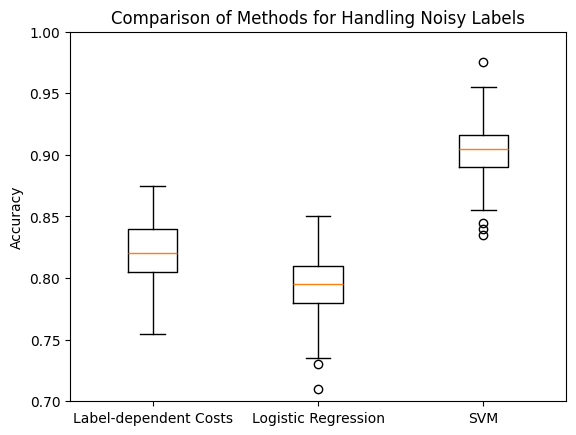

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/bekon/Master_thesis/modules')
from noisy_data_simulation import NoisyLabelSimulation

# Create a simulated dataset
def run_simulation():
    simulation = NoisyLabelSimulation(n_samples=1000, n_features=15, noise_rate_positive=0.1, noise_rate_negative=0.3, seed=42)
    X, y, y_noisy = simulation.get_data()

# Define the label-dependent costs
def calculate_label_dependent_costs(noise_rate_positive, noise_rate_negative):
    alpha_star = (0.5 - noise_rate_negative) / (1 - noise_rate_positive - noise_rate_negative)
    costs = {1: alpha_star, -1: 1 - alpha_star}
    return costs

# Main simulation function
def simulation_study(n_datasets=100, n_samples=1000, n_features=15, noise_rate_positive=0.1, noise_rate_negative=0.3, test_size=0.2, seed=None):
    accuracies_weighted_lr = []
    accuracies_unweighted_lr = []
    accuracies_svm = []
    simulation = NoisyLabelSimulation(n_samples, n_features, noise_rate_positive, noise_rate_negative, correlation=0.8, seed=seed)
    datasets = simulation.generate_multiple_datasets(n_datasets)
    
    for i, (X, y, y_noisy) in enumerate(datasets):
        seed_i = seed + i if seed is not None else None
        
        # Calculate label-dependent costs
        costs = calculate_label_dependent_costs(noise_rate_positive, noise_rate_negative)
        
        # Scale the features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Split data
        X_train, X_test, y_train_clean, y_test_clean = train_test_split(X_scaled, y, test_size=test_size, random_state=seed_i)
        _, _, y_train_noisy, _ = train_test_split(X_scaled, y_noisy, test_size=test_size, random_state=seed_i)
        
        # Logistic Regression with Label-Dependent Costs
        clf_weighted_lr = LogisticRegression(class_weight=costs)
        clf_weighted_lr.fit(X_train, y_train_noisy)
        y_pred_weighted_lr = clf_weighted_lr.predict(X_test)
        accuracy_weighted_lr = accuracy_score(y_test_clean, y_pred_weighted_lr)
        accuracies_weighted_lr.append(accuracy_weighted_lr)
        
        # Logistic Regression without Label-Dependent Costs
        clf_unweighted_lr = LogisticRegression()
        clf_unweighted_lr.fit(X_train, y_train_noisy)
        y_pred_unweighted_lr = clf_unweighted_lr.predict(X_test)
        accuracy_unweighted_lr = accuracy_score(y_test_clean, y_pred_unweighted_lr)
        accuracies_unweighted_lr.append(accuracy_unweighted_lr)
        
        # SVM without Label-Dependent Costs
        clf_svm = SVC()
        clf_svm.fit(X_train, y_train_noisy)
        y_pred_svm = clf_svm.predict(X_test)
        accuracy_svm = accuracy_score(y_test_clean, y_pred_svm)
        accuracies_svm.append(accuracy_svm)
    
    print(f"Simulation Study: n_samples={n_samples}, n_features={n_features}, noise_rate_positive={noise_rate_positive}, noise_rate_negative={noise_rate_negative}")
    return accuracies_weighted_lr, accuracies_unweighted_lr, accuracies_svm

# Run the simulation study
accuracies_weighted_lr, accuracies_unweighted_lr, accuracies_svm = simulation_study(seed=42)

# Calculate mean and standard deviation of accuracies for each method
mean_accuracy_weighted_lr = np.mean(accuracies_weighted_lr)
std_accuracy_weighted_lr = np.std(accuracies_weighted_lr)
mean_accuracy_unweighted_lr = np.mean(accuracies_unweighted_lr)
std_accuracy_unweighted_lr = np.std(accuracies_unweighted_lr)
mean_accuracy_svm = np.mean(accuracies_svm)
std_accuracy_svm = np.std(accuracies_svm)

print(f"Label-dependent Costs - Mean accuracy: {mean_accuracy_weighted_lr:.4f}, Standard deviation: {std_accuracy_weighted_lr:.4f}")
print(f"Unweighted Logistic Regression - Mean accuracy: {mean_accuracy_unweighted_lr:.4f}, Standard deviation: {std_accuracy_weighted_lr:.4f}")
print(f"SVM - Mean accuracy: {mean_accuracy_svm:.4f}, Standard deviation: {std_accuracy_svm:.4f}")

# Additional: Visualize the results (optional)
def visualize_results(accuracies_weighted_lr, accuracies_unweighted_lr, accuracies_svm, filename = "label_dependent_costs_cor.jpg"):
    plt.boxplot([accuracies_weighted_lr, accuracies_unweighted_lr, accuracies_svm], labels=['Label-dependent Costs', 'Logistic Regression', 'SVM'])
    plt.ylim(0.70, 1)
    plt.ylabel('Accuracy')
    plt.title('Comparison of Methods for Handling Noisy Labels')
    plt.savefig(r'C:\Users\bekon\Master_thesis\graphs\label_dependent_costs_cor.jpg', format='jpg', dpi=300)
    plt.show()

# Visualize the accuracies
visualize_results(accuracies_weighted_lr, accuracies_unweighted_lr, accuracies_svm, filename="label_dependent_costs_cor.jpg")

#### Hypothesis Testing
*Does the noise rate being fixed have an impact on the accuracy of the model?*

Paired t-test results: t-statistic = 10.4270, p-value = 0.0000
Reject the null hypothesis: There is a significant difference in performance.
Cohen's d: 1.3254


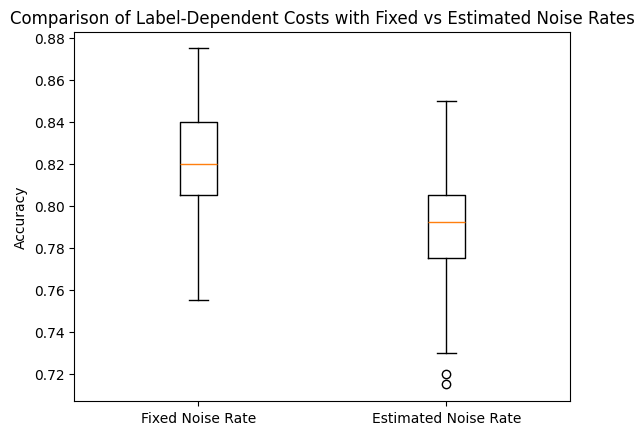

In [11]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt

from noisy_data_simulation import NoisyLabelSimulation

# Create a simulated dataset
def run_simulation():
    simulation = NoisyLabelSimulation(n_samples=1000, n_features=15, noise_rate_positive=0.1, noise_rate_negative=0.3, seed=42)
    X, y, y_noisy = simulation.get_data()

# Define the label-dependent costs
def calculate_label_dependent_costs(noise_rate_positive, noise_rate_negative):
    alpha_star = (0.5 - noise_rate_negative) / (1 - noise_rate_positive - noise_rate_negative)
    costs = {1: alpha_star, -1: 1 - alpha_star}
    return costs

# Function to estimate noise rates
def estimate_noise_rate(X_train, y_train_noisy, threshold=0.9):
    """
    Estimate the noise rates for positive and negative classes.
    This function uses a logistic regression model to estimate the probabilities of the labels
    and then estimates the noise rate based on high-confidence misclassified instances.
    """
    model = LogisticRegression()
    model.fit(X_train, y_train_noisy)

    # Predict probabilities
    probs = model.predict_proba(X_train)
    probs_positive = probs[:, 1]  # Probability of the positive class

    positive_errors = (probs_positive > threshold) & (y_train_noisy == -1)
    negative_errors = (probs_positive < (1 - threshold)) & (y_train_noisy == 1)

    # Estimate noise rates
    estimated_rho_plus = np.mean(positive_errors)
    estimated_rho_minus = np.mean(negative_errors)

    return estimated_rho_plus, estimated_rho_minus

# Main simulation function with both fixed and estimated noise rates
def simulation_study_label_dependent_costs(n_datasets=100, n_samples=1000, n_features=15, noise_rate_positive=0.1, noise_rate_negative=0.3, test_size=0.2, seed=None):
    accuracies_fixed = []
    accuracies_estimated = []
    simulation = NoisyLabelSimulation(n_samples, n_features, noise_rate_positive, noise_rate_negative, correlation=0.8, seed=seed)
    datasets = simulation.generate_multiple_datasets(n_datasets)
    
    for i, (X, y, y_noisy) in enumerate(datasets):
        seed_i = seed + i if seed is not None else None
        
        # Split data
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_train, X_test, y_train_clean, y_test_clean = train_test_split(X_scaled, y, test_size=test_size, random_state=seed_i)
        _, _, y_train_noisy, _ = train_test_split(X_scaled, y_noisy, test_size=test_size, random_state=seed_i)

        # Scenario 1: Fixed Noise Rates
        costs_fixed = calculate_label_dependent_costs(noise_rate_positive, noise_rate_negative)
        clf_weighted_lr_fixed = LogisticRegression(class_weight=costs_fixed)
        clf_weighted_lr_fixed.fit(X_train, y_train_noisy)
        y_pred_fixed = clf_weighted_lr_fixed.predict(X_test)
        accuracy_fixed = accuracy_score(y_test_clean, y_pred_fixed)
        accuracies_fixed.append(accuracy_fixed)
        
        # Scenario 2: Estimated Noise Rates
        estimated_rho_plus, estimated_rho_minus = estimate_noise_rate(X_train, y_train_noisy)
        costs_estimated = calculate_label_dependent_costs(estimated_rho_plus, estimated_rho_minus)
        clf_weighted_lr_estimated = LogisticRegression(class_weight=costs_estimated)
        clf_weighted_lr_estimated.fit(X_train, y_train_noisy)
        y_pred_estimated = clf_weighted_lr_estimated.predict(X_test)
        accuracy_estimated = accuracy_score(y_test_clean, y_pred_estimated)
        accuracies_estimated.append(accuracy_estimated)
    
    return accuracies_fixed, accuracies_estimated

# Run the simulation study for both fixed and estimated noise rates
accuracies_fixed, accuracies_estimated = simulation_study_label_dependent_costs(seed=42)

# Perform a paired t-test to check if there is a significant difference
t_statistic, p_value = stats.ttest_rel(accuracies_fixed, accuracies_estimated)
print(f"Paired t-test results: t-statistic = {t_statistic:.4f}, p-value = {p_value:.4f}")

# Interpretation of the hypothesis test result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in performance.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in performance.")

# Calculate Cohen's d to measure effect size
mean_fixed = np.mean(accuracies_fixed)
mean_estimated = np.mean(accuracies_estimated)
std_pooled = np.sqrt((np.std(accuracies_fixed, ddof=1) ** 2 + np.std(accuracies_estimated, ddof=1) ** 2) / 2)
cohens_d = (mean_fixed - mean_estimated) / std_pooled
print(f"Cohen's d: {cohens_d:.4f}")

# Visualization: Compare the accuracies for fixed and estimated noise rates
def visualize_label_dependent_costs_comparison(accuracies_fixed, accuracies_estimated, filename = "label_dependent_noise_rates.jpg"):
    data = [accuracies_fixed, accuracies_estimated]
    plt.boxplot(data, labels=['Fixed Noise Rate', 'Estimated Noise Rate'])
    plt.ylabel('Accuracy')
    plt.title('Comparison of Label-Dependent Costs with Fixed vs Estimated Noise Rates')
    plt.savefig(r'C:\Users\bekon\Master_thesis\graphs\label_dependent_noise_rates.jpg', format='jpg', dpi=300)
    plt.show()

# Visualize the accuracies
visualize_label_dependent_costs_comparison(accuracies_fixed, accuracies_estimated, filename = "label_dependent_noise_rates.jpg")

#### Effect of Noise Rate on Accuracy

In [2]:
from simulation_multiple_configs import simulation_study_multiple_configs

# Now call the consistent simulation_study_multiple_configs
noise_rate_positives = [0.1, 0.2, 0.3]
noise_rate_negatives = [0.1, 0.2, 0.3]
n_features_list = [15, 20, 30]
n_samples_list = [1000, 2000, 3000]

results_label_dependent_costs = simulation_study_multiple_configs(simulation_study, noise_rate_positives, noise_rate_negatives, 
                                                                  n_features_list, n_samples_list, n_datasets=100, seed=42)

import pandas as pd
# Convert results to DataFrame for easier analysis
df_results_label_dependent_costs = pd.DataFrame(results_label_dependent_costs)

Running simulation for noise_rate_positive=0.1, noise_rate_negative=0.1, n_features=15, n_samples=1000
Simulation Study: n_samples=1000, n_features=15, noise_rate_positive=0.1, noise_rate_negative=0.1
Running simulation for noise_rate_positive=0.1, noise_rate_negative=0.1, n_features=15, n_samples=2000
Simulation Study: n_samples=2000, n_features=15, noise_rate_positive=0.1, noise_rate_negative=0.1
Running simulation for noise_rate_positive=0.1, noise_rate_negative=0.1, n_features=15, n_samples=3000
Simulation Study: n_samples=3000, n_features=15, noise_rate_positive=0.1, noise_rate_negative=0.1
Running simulation for noise_rate_positive=0.1, noise_rate_negative=0.1, n_features=20, n_samples=1000
Simulation Study: n_samples=1000, n_features=20, noise_rate_positive=0.1, noise_rate_negative=0.1
Running simulation for noise_rate_positive=0.1, noise_rate_negative=0.1, n_features=20, n_samples=2000
Simulation Study: n_samples=2000, n_features=20, noise_rate_positive=0.1, noise_rate_negative

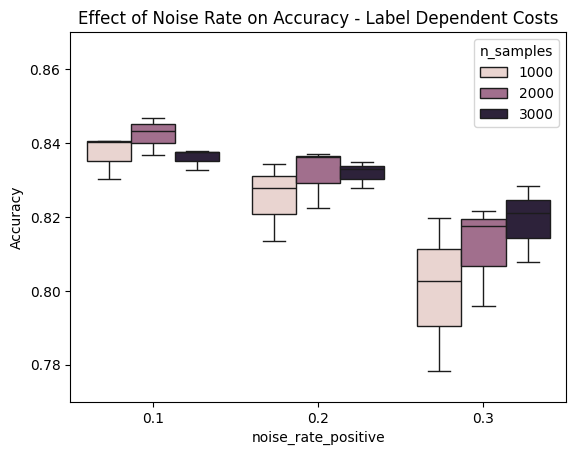

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot visualization function using seaborn
def visualize_boxplot(df_results_label_dependent_costs, filename="label_dependent_noise.jpg"):
    sns.boxplot(x='noise_rate_positive', y='mean_accuracy_weighted_lr', hue='n_samples', data=df_results_label_dependent_costs)
    plt.title("Effect of Noise Rate on Accuracy - Label Dependent Costs")
    plt.ylim(0.77, 0.87)
    plt.ylabel('Accuracy')
    plt.savefig(r'C:\Users\bekon\Master_thesis\graphs\label_dependent_noise.jpg', format='jpg', dpi=300)
    plt.show()

# Visualize the accuracies using boxplot
visualize_boxplot(df_results_label_dependent_costs)


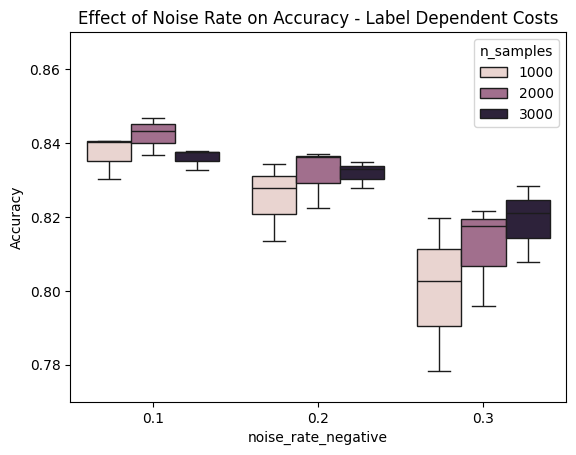

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot visualization function using seaborn
def visualize_boxplot(df_results_label_dependent_costs, filename="label_dependent_noise.jpg"):
    sns.boxplot(x='noise_rate_negative', y='mean_accuracy_weighted_lr', hue='n_samples', data=df_results_label_dependent_costs)
    plt.title("Effect of Noise Rate on Accuracy - Label Dependent Costs")
    plt.ylim(0.77, 0.87)
    plt.ylabel('Accuracy')
    # plt.savefig(r'C:\Users\bekon\Master_thesis\graphs\label_dependent_noise.jpg', format='jpg', dpi=300)
    plt.show()

# Visualize the accuracies using boxplot
visualize_boxplot(df_results_label_dependent_costs)


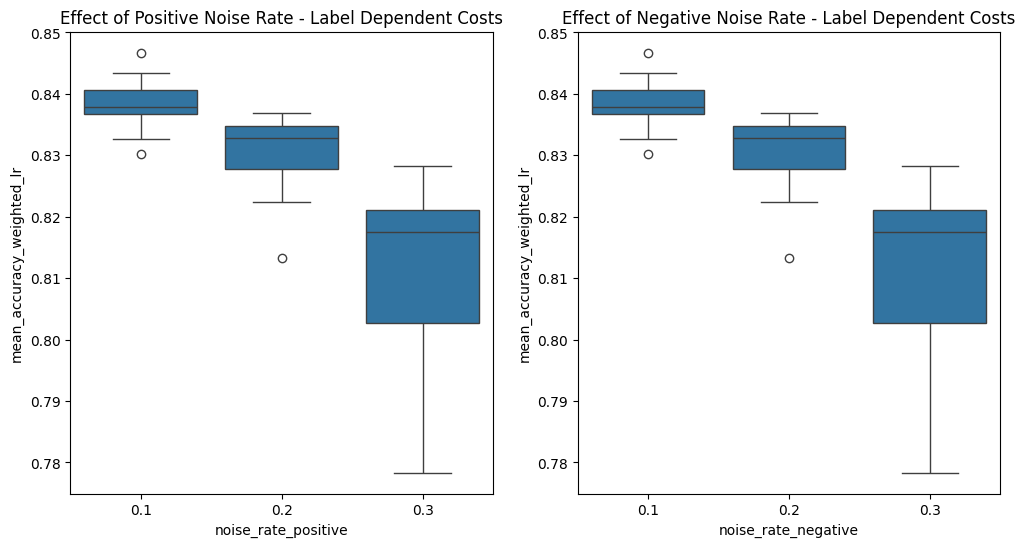

In [11]:
def visualize_boxplot_separate(df_results_label_dependent_costs, filename="label_dependent_noise.jpg"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for noise_rate_positive
    sns.boxplot(x='noise_rate_positive', y='mean_accuracy_weighted_lr', data=df_results_label_dependent_costs, ax=axes[0])
    axes[0].set_title("Effect of Positive Noise Rate - Label Dependent Costs")

    # Plot for noise_rate_negative
    sns.boxplot(x='noise_rate_negative', y='mean_accuracy_weighted_lr', data=df_results_label_dependent_costs, ax=axes[1])
    axes[1].set_title("Effect of Negative Noise Rate - Label Dependent Costs")

    plt.savefig(r'C:\Users\bekon\Master_thesis\graphs\label_dependent_noise_separate.jpg', format='jpg', dpi=300)
    plt.show()

# Visualize the accuracies using separate boxplots
visualize_boxplot_separate(df_results_label_dependent_costs)

### UCI Benchmark Dataset

Label-Dependent Costs - Mean accuracy: 0.9451, Standard deviation: 0.0237
Unweighted Logistic Regression - Mean accuracy: 0.8880, Standard deviation: 0.0310
SVM - Mean accuracy: 0.9335, Standard deviation: 0.0275


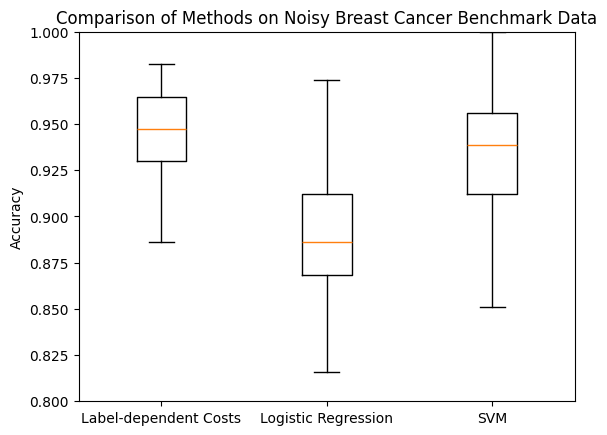

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class NoisyLabelSimulation:
    def __init__(self, noise_rate_positive=0.1, noise_rate_negative=0.3, seed=None):
        self.noise_rate_positive = noise_rate_positive
        self.noise_rate_negative = noise_rate_negative
        self.seed = seed
        self.X = None
        self.y = None
        self.y_noisy = None
    
    def load_and_preprocess_data(self):
        """
        Load and preprocess the UCI Breast Cancer dataset.
        """
        # Load dataset
        data = load_breast_cancer()
        self.X = data.data
        self.y = data.target
        
        # Standardize the features
        scaler = StandardScaler()
        self.X = scaler.fit_transform(self.X)
        
        # Convert labels from {0, 1} to {-1, 1}
        self.y = np.where(self.y == 0, -1, 1)
    
    def introduce_noise(self):
        """
        Introduce noise into the labels.
        """
        self.y_noisy = self.y.copy()
        indices_class_1 = np.where(self.y == 1)[0]
        indices_class_minus_1 = np.where(self.y == -1)[0]
        n_flip_class_1 = int(self.noise_rate_positive * len(indices_class_1))
        flip_indices_class_1 = np.random.choice(indices_class_1, size=n_flip_class_1, replace=False)
        n_flip_class_minus_1 = int(self.noise_rate_negative * len(indices_class_minus_1))
        flip_indices_class_minus_1 = np.random.choice(indices_class_minus_1, size=n_flip_class_minus_1, replace=False)
        self.y_noisy[flip_indices_class_1] = -self.y_noisy[flip_indices_class_1]
        self.y_noisy[flip_indices_class_minus_1] = -self.y_noisy[flip_indices_class_minus_1]
    
    def get_data(self):
        """
        Return the data with noisy labels.
        """
        self.load_and_preprocess_data()
        self.introduce_noise()
        return self.X, self.y, self.y_noisy

# Define the label-dependent costs
def calculate_label_dependent_costs(noise_rate_positive, noise_rate_negative):
    alpha_star = (0.5 - noise_rate_negative) / (1 - noise_rate_positive - noise_rate_negative)
    costs = {1: alpha_star, -1: 1 - alpha_star}
    return costs

# Main simulation function
def simulation_study_label_dependent_costs(n_datasets=100, noise_rate_positive=0.1, noise_rate_negative=0.3, test_size=0.2, seed=None):
    accuracies_weighted_lr = []
    accuracies_unweighted_lr = []
    accuracies_svm = []
    simulation = NoisyLabelSimulation(noise_rate_positive, noise_rate_negative, seed)
    
    for i in range(n_datasets):
        X, y, y_noisy = simulation.get_data()
        seed_i = seed + i if seed is not None else None
        
        # Calculate label-dependent costs
        costs = calculate_label_dependent_costs(noise_rate_positive, noise_rate_negative)
        
        # Split data
        X_train, X_test, y_train_clean, y_test_clean = train_test_split(X, y, test_size=test_size, random_state=seed_i)
        _, _, y_train_noisy, _ = train_test_split(X, y_noisy, test_size=test_size, random_state=seed_i)
        
        # Logistic Regression with Label-Dependent Costs
        clf_weighted_lr = LogisticRegression(class_weight=costs)
        clf_weighted_lr.fit(X_train, y_train_noisy)
        y_pred_weighted_lr = clf_weighted_lr.predict(X_test)
        accuracy_weighted_lr = accuracy_score(y_test_clean, y_pred_weighted_lr)
        accuracies_weighted_lr.append(accuracy_weighted_lr)
        
        # Logistic Regression without Label-Dependent Costs
        clf_unweighted_lr = LogisticRegression()
        clf_unweighted_lr.fit(X_train, y_train_noisy)
        y_pred_unweighted_lr = clf_unweighted_lr.predict(X_test)
        accuracy_unweighted_lr = accuracy_score(y_test_clean, y_pred_unweighted_lr)
        accuracies_unweighted_lr.append(accuracy_unweighted_lr)
        
        # SVM without Label-Dependent Costs
        clf_svm = SVC()
        clf_svm.fit(X_train, y_train_noisy)
        y_pred_svm = clf_svm.predict(X_test)
        accuracy_svm = accuracy_score(y_test_clean, y_pred_svm)
        accuracies_svm.append(accuracy_svm)
    
    return accuracies_weighted_lr, accuracies_unweighted_lr, accuracies_svm

# Run the simulation study
accuracies_weighted_lr, accuracies_unweighted_lr, accuracies_svm = simulation_study_label_dependent_costs(seed=42)

# Calculate mean and standard deviation of accuracies for each method
mean_accuracy_weighted_lr = np.mean(accuracies_weighted_lr)
std_accuracy_weighted_lr = np.std(accuracies_weighted_lr)
mean_accuracy_unweighted_lr = np.mean(accuracies_unweighted_lr)
std_accuracy_unweighted_lr = np.std(accuracies_unweighted_lr)
mean_accuracy_svm = np.mean(accuracies_svm)
std_accuracy_svm = np.std(accuracies_svm)

print(f"Label-Dependent Costs - Mean accuracy: {mean_accuracy_weighted_lr:.4f}, Standard deviation: {std_accuracy_weighted_lr:.4f}")
print(f"Unweighted Logistic Regression - Mean accuracy: {mean_accuracy_unweighted_lr:.4f}, Standard deviation: {std_accuracy_unweighted_lr:.4f}")
print(f"SVM - Mean accuracy: {mean_accuracy_svm:.4f}, Standard deviation: {std_accuracy_svm:.4f}")

# Additional: Visualize the results (optional)
def visualize_results(accuracies_weighted_lr, accuracies_unweighted_lr, accuracies_svm, filename = "label_dependent_costs_uci.jpg"):
    plt.boxplot([accuracies_weighted_lr, accuracies_unweighted_lr, accuracies_svm], labels=['Label-dependent Costs', 'Logistic Regression', 'SVM'])
    plt.ylim(0.80, 1)
    plt.ylabel('Accuracy')
    plt.title('Comparison of Methods on Noisy Breast Cancer Benchmark Data')
    plt.savefig(r'C:\Users\bekon\Master_thesis\graphs\label_dependent_costs_uci.jpg', format='jpg', dpi=300)
    plt.show()

# Visualize the accuracies
visualize_results(accuracies_weighted_lr, accuracies_unweighted_lr, accuracies_svm, filename = "label_dependent_costs_uci.jpg")